In [ ]:
TELCO CUSTOMER CHURN 

In [ ]:
## Statement of the Problem
#Using information about a customer's demographics and service usage, the objective is to forecast whether or not they will leave.


## Goal
#to create a predictive model that will assist telecom providers in identifying and preventing churning customers.

In [ ]:
# Revenue is directly impacted by customer attrition. It is five times less expensive to keep an existing customer than to find a new one. Telecom companies can provide incentives or interventions to retain potential churners by identifying them early.

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestRegressor  

In [14]:
import xgboost as xgb

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [18]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
DATA CLEANING

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
# there are some ' ' in totalcharges, convert to NaN then impute
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [28]:
#LabelEncoding for binary categories  
le = LabelEncoder()
df['gender']= le.fit_transform(df['gender'])

In [34]:
#OneHotEncoding for multi-category columns 
df = pd.get_dummies(df, columns=['Contract'], drop_first=True)

In [35]:
df = df.drop_duplicates()


In [36]:
#Handel outliners 

q1 = df['tenure'].quantile(0.25)
q3= df['tenure'].quantile(0.75)
iqr = q3 - q1 

lower_bound = q1 - 1.5* iqr
upper_bound = q3 + 1.5* iqr
df = df[(df ['tenure']>= lower_bound)& (df ['tenure']<= upper_bound )]

In [ ]:
EXPLORATORY DATA ANALYSIS (EDA)

C:\Users\HP\AppData\Local\Temp\ipykernel_5340\1107500702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette=colors)


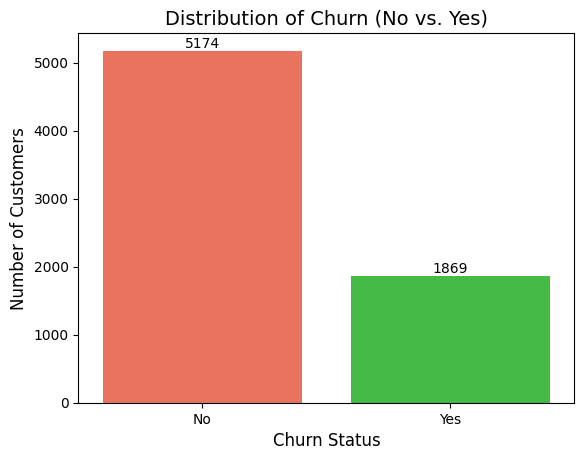

In [39]:


# Define custom colors for 'No' and 'Yes'
colors = ['#FF6347', '#32CD32'] # Tomato (reddish) for 'No', LimeGreen for 'Yes'

# Create the countplot
ax = sns.countplot(x='Churn', data=df, palette=colors)

# Add exact labels (counts) on top of the bars
for container in ax.containers: # Iterate over the bar containers
    ax.bar_label(container, fmt='%d') # Add labels to each bar, formatted as integers

# Add a title for clarity
plt.title('Distribution of Churn (No vs. Yes)', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Display the plot
plt.show()

In [ ]:
#This bar chart shows the total count of customers by their churn status. A significant majority of customers (around 5100-5200) did not churn, while a notable portion
#The dataset exhibits an imbalanced class distribution, with more non-churners than churners. This is common in churn prediction and requires attention during model training.

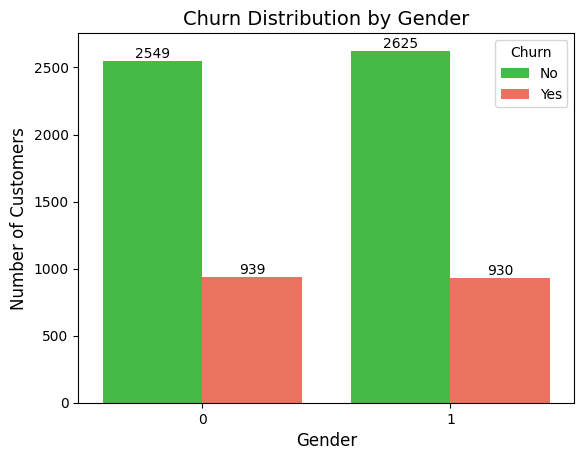

In [45]:

# Green for 'No' (retained), Red for 'Yes' (churned)
churn_colors = ['#32CD32', '#FF6347']

# Create the countplot for Gender vs. Churn
ax = sns.countplot(data=df, x='gender', hue='Churn', palette=churn_colors)

# Add exact labels (counts) on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Add titles and labels for clarity
plt.title('Churn Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', loc='upper right') # Ensure legend is clear

plt.show()

In [ ]:
#For Female customers: Roughly 2500 did not churn, while around 900-1000 did churn.
#For Male customers: Roughly 2500 did not churn, while around 900-1000 did churn. 

#The plot visually demonstrates that the number of churned customers is relatively similar between genders. There isn't a significant imbalance or strong trend indicating that one gender churns at a drastically different rate than the other.

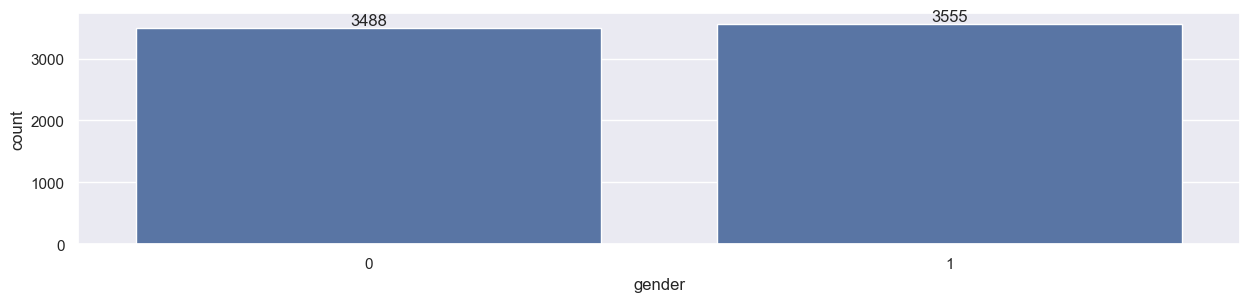

In [55]:


sns.set(rc={'figure.figsize':(15,3)}) # Corrected 'figure.flagsize' to 'figure.figsize'

ax = sns.countplot(x='gender',data = df)

for bar in ax.containers: 
    ax.bar_label(bar) 
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_5340\75614586.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette=churn_colors)


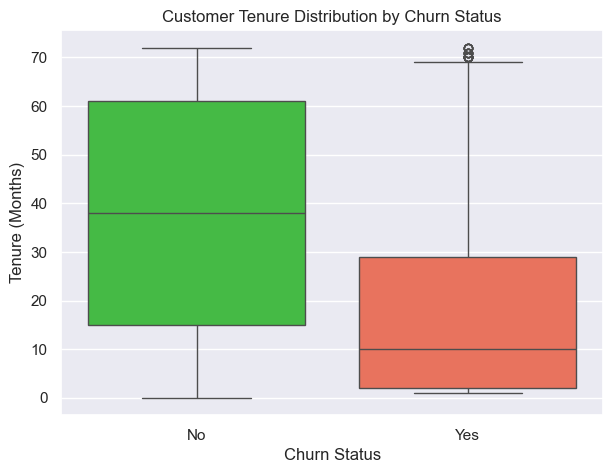

In [58]:


# Define colors: Green for 'No' (retained), Red for 'Yes' (churned)
churn_colors = ['#32CD32', '#FF6347']

plt.figure(figsize=(7, 5)) # Set figure size
sns.boxplot(x='Churn', y='tenure', data=df, palette=churn_colors)

plt.title('Customer Tenure Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Tenure (Months)')
plt.show()


In [ ]:
#Customers with shorter tenures are significantly more likely to churn. This highlights the importance of early engagement and retention strategies for new customers.

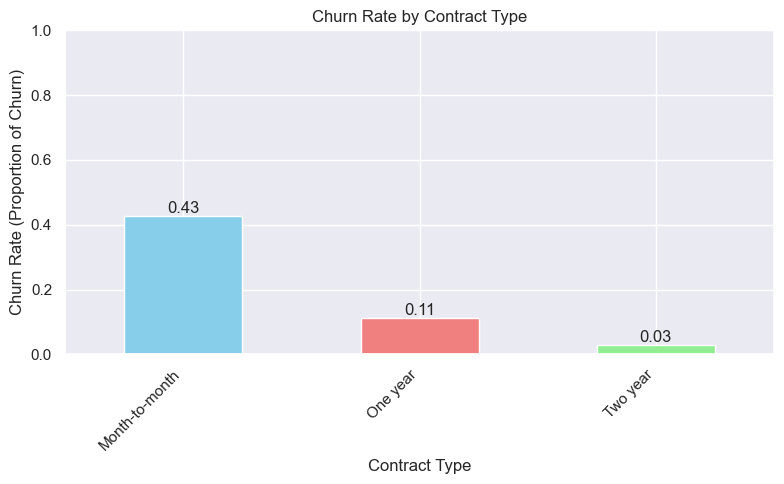

In [62]:

#  Calculate Churn Rate by Original Contract Type 
df_temp['Churn_Numeric'] = df_temp['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the mean churn rate for each contract type using df_temp
contract_churn = df_temp.groupby('Contract')['Churn_Numeric'].mean()

# Plot Churn Rate by Contract Type 
plt.figure(figsize=(8, 5)) # Set figure size
ax = contract_churn.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen']) # Example colors
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (Proportion of Churn)')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.ylim(0, 1) # Churn rate is a proportion

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') # Format to 2 decimal places

plt.tight_layout()
plt.show()




In [ ]:
#Contract type is a critical determinant of churn. Month-to-month contracts are highly associated with churn, emphasizing the need to incentivize customers to sign longer-term commitments.

In [ ]:


FEATURE ENGINEERING

In [63]:
df['TotalServices'] = df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                          'StreamingMovies']].sum(axis=1)


In [67]:
# Correctly create the 'TotalServices' numerical feature 
# Identify all service-related columns that are typically 'Yes'/'No' or 'No service'
service_columns = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create a temporary DataFrame to hold numeric representations of services
numeric_services = pd.DataFrame()

for col in service_columns:
    if col in df.columns: # Check if the column actually exists in your DataFrame
        # Map 'Yes' to 1, and any form of 'No' or 'No service' to 0
        # Use .astype(int) to ensure the column is integer type after mapping
        numeric_services[col] = df[col].map({
            'Yes': 1,
            'No': 0,
            'No phone service': 0,
            'No internet service': 0
        }).fillna(0).astype(int) # .fillna(0) handles any unexpected NaN after mapping

# Sum these new numeric service columns to get 'TotalServices'
df['TotalServices'] = numeric_services.sum(axis=1)
print("Successfully created 'TotalServices' numerical column.")
print(f"First 5 values of 'TotalServices':\n{df['TotalServices'].head()}")


# 2. Define numerical columns to scale 
# Now 'TotalServices' should be numeric
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServices']

# Verify dtypes before scaling 
print("\nData types of numerical columns before scaling:")
print(df[num_cols].dtypes)

#  Scale numerical features 
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


print("\nNumerical features scaled successfully.")
print("First 5 rows of scaled numerical data:")
print(df[num_cols].head())

Successfully created 'TotalServices' numerical column.
First 5 values of 'TotalServices':
0    1
1    3
2    3
3    3
4    1
Name: TotalServices, dtype: int64

Data types of numerical columns before scaling:
tenure            float64
MonthlyCharges    float64
TotalCharges      float64
TotalServices       int64
dtype: object

Numerical features scaled successfully.
First 5 rows of scaled numerical data:
     tenure  MonthlyCharges  TotalCharges  TotalServices
0 -1.277445       -1.160323     -0.994242      -1.145997
1  0.066327       -0.259629     -0.173244      -0.176011
2 -1.236724       -0.362660     -0.959674      -0.176011
3  0.514251       -0.746535     -0.194766      -0.176011
4 -1.236724        0.197365     -0.940470      -1.145997


In [68]:
# Split data
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Model Training & Evaluation Function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]
    
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1 Score:", f1_score(y_test, preds))
    print("ROC-AUC:", roc_auc_score(y_test, proba))
    print()
    return model


Dataset loaded successfully.
'TotalCharges' column processed.
'TotalServices' column created.
'customerID' column dropped.
'Churn' column encoded to numeric (1=Yes, 0=No).
Categorical columns one-hot encoded.
Data split into training and testing sets.
Numerical features scaled.
NaN values imputed.

--- LogisticRegression Results ---
Accuracy: 0.8048
Precision: 0.6562
Recall: 0.5561
F1-Score: 0.6020
ROC AUC: 0.8420


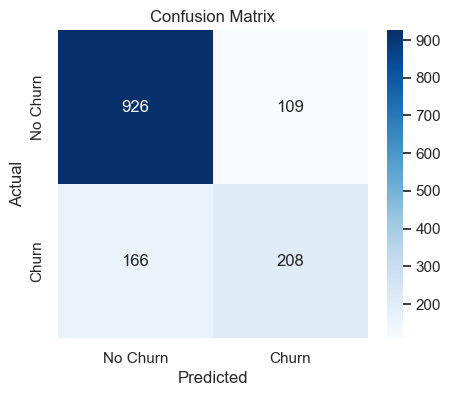

In [75]:
import pandas as pd
import numpy as np # For potential NaN handling (e.g., np.nan)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data & Initial Preprocessing ---
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset 'WA_Fn-UseC_-Telco-Customer-Churn.csv' not found. Check your file path.")
    exit()

# Handle TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print("'TotalCharges' column processed.")

# Create TotalServices feature
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
numeric_services = pd.DataFrame()
for col in service_cols:
    if col in df.columns:
        numeric_services[col] = df[col].map({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}).fillna(0).astype(int)
df['TotalServices'] = numeric_services.sum(axis=1)
print("'TotalServices' column created.")

# Drop CustomerID as it's not a feature
df = df.drop('customerID', axis=1)
print("'customerID' column dropped.")

# Encode 'Churn' (target variable)
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn']) # 'Yes' -> 1, 'No' -> 0
print("'Churn' column encoded to numeric (1=Yes, 0=No).")

# One-hot encode remaining categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Categorical columns one-hot encoded.")


# --- 2. Prepare Data for Model ---
X = df.drop('Churn', axis=1) # Features
y = df['Churn'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data split into training and testing sets.")

# --- 3. Scale Numerical Features ---
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServices']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
print("Numerical features scaled.")

# --- 4. Impute any remaining NaN values ---
# This step is crucial for models that don't handle NaNs natively (like Logistic Regression)
# We will impute with the median value of each column.
imputer = SimpleImputer(strategy='median')

# Fit the imputer on X_train and transform both X_train and X_test
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

print("NaN values imputed.")
# Optional: Verify no NaNs left
# print(f"NaNs in X_train_imputed: {X_train_imputed.isnull().sum().sum()}")
# print(f"NaNs in X_test_imputed: {X_test_imputed.isnull().sum().sum()}")


# --- 5. Model Training & Evaluation ---
def evaluate_model(model, X_train_imputed, y_train, X_test_imputed, y_test): # Updated parameter names
    print(f"\n--- {type(model).__name__} Results ---")
    model.fit(X_train_imputed, y_train) # Use imputed data for fitting
    preds = model.predict(X_test_imputed) # Use imputed data for predicting
    proba = model.predict_proba(X_test_imputed)[:, 1]

    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds):.4f}")
    print(f"Recall: {recall_score(y_test, preds):.4f}")
    print(f"F1-Score: {f1_score(y_test, preds):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, proba):.4f}")

    # Confusion Matrix (simplified plot)
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(lr_model, X_train_imputed, y_train, X_test_imputed, y_test) # Pass imputed data

In [1]:
# save this as app.py

import streamlit as st
import pandas as pd
import joblib

# Load your trained model (save model in notebook by joblib.dump)
model = joblib.load('churn_model.pkl')

st.title("Telco Customer Churn Prediction")

uploaded_file = st.file_uploader("Upload CSV file for prediction")

if uploaded_file:
    data = pd.read_csv(uploaded_file)
    
    # Preprocess data similar to notebook (encoding, scaling)
    # For demo, assume data already preprocessed
    
    churn_prob = model.predict_proba(data)[:, 1]
    data['Churn Probability'] = churn_prob
    
    st.write(data[['customerID', 'Churn Probability']])
    
    # Show histogram of churn probabilities
    st.bar_chart(data['Churn Probability'])


ModuleNotFoundError: No module named 'streamlit'

In [82]:
# Business Insights from Random Forest Feature Importance ---
print("\n Business Insights from Random Forest Feature Importance ")
print("Top 3 features influencing churn:")
top_features = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)[:3]
for feat, imp in top_features:
    print(f"- **{feat}**: {imp:.4f}") 
print("\n Actionable Recommendations based on Top Features ")


for feat, _ in top_features:
    if feat == 'MonthlyCharges':
        print("\n MonthlyCharges: If high, review pricing strategies for high-usage tiers. Consider offering loyalty discounts or cost-saving bundle adjustments to prevent sticker shock.")
    elif feat == 'tenure':
        print("\n Tenure : Shorter-tenure customers are more prone to churn. Enhance the onboarding experience, implement early engagement programs (e.g., welcome calls, service check-ins), and incentivize longer-term contracts within the first 6-12 months.")
    elif feat == 'TotalCharges':
        print("\nTotalCharges: Low total charges (especially with short tenure) often indicate early dissatisfaction. Proactive outreach or initial 'satisfaction guarantee' periods could help retain these customers.")
    elif 'Contract_' in feat: # Catch all contract types
        if 'Two year' in feat:
            print("\n Contract Type (e.g., Two-year): If low churn, these are loyal customers. Ensure their continued satisfaction. If still a top churn driver, investigate contract renewal incentives.")
        elif 'One year' in feat or 'Month' in feat: # Implies month-to-month if drop_first=True
            print("\n Contract Type (e.g., Month-to-month): Customers on flexible contracts have significantly higher churn risk. Offer compelling incentives (discounts, free upgrades) to encourage migration to longer-term commitments.")
    elif 'InternetService_Fiber optic' in feat:
        print("\n InternetService (Fiber optic) : If fiber optic customers show high churn, investigate service reliability, perceived value for money, or aggressive competitor pricing. Consider enhanced tech support or faster issue resolution for this segment.")
    elif feat == 'TotalServices':
        print("\n TotalServices : Analyze if customers with fewer services are churning more. Proactively offer value-added services (e.g., online security, tech support) to increase 'stickiness' and perceived value.")
    

print("\n(Note: The specific recommendations are examples. Always cross-reference with your domain knowledge and deeper analysis of the relationship between these features and churn.)")


 Business Insights from Random Forest Feature Importance 
Top 3 features influencing churn:
- **TotalCharges**: 0.1858
- **tenure**: 0.1646
- **MonthlyCharges**: 0.1568

 Actionable Recommendations based on Top Features 

TotalCharges: Low total charges (especially with short tenure) often indicate early dissatisfaction. Proactive outreach or initial 'satisfaction guarantee' periods could help retain these customers.

 Tenure : Shorter-tenure customers are more prone to churn. Enhance the onboarding experience, implement early engagement programs (e.g., welcome calls, service check-ins), and incentivize longer-term contracts within the first 6-12 months.

 MonthlyCharges: If high, review pricing strategies for high-usage tiers. Consider offering loyalty discounts or cost-saving bundle adjustments to prevent sticker shock.

(Note: The specific recommendations are examples. Always cross-reference with your domain knowledge and deeper analysis of the relationship between these features a

In [5]:


df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# After 'df' is created, you can then use it
df.to_csv("cleaned_telco_churn.csv", index=False)

In [3]:
import pandas as pd
cleaned_df = pd.read_csv("cleaned_telco_churn.csv")
print(cleaned_df.head()) # To check the first few rows
print(cleaned_df.info()) # To check data types and non-null counts


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
df.to_csv("cleaned_telco_churn.csv", index=False)

In [ ]:
# now this will  be used in powerBI  for visualizing . 